# Explore

## Questions to Answer:
- Is there a link to which form of reporting is responded to quickest and slowest?
-  Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)

In [1]:
import wrangle as w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df = w.clean_311(w.get_311_data())

In [3]:
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1018 KING AVE, San Antonio, 78211",4,2108015.0,13680344.0,804.0,933,129.0,Very Early Response,0,0,0,0,1,0,0,0,0,0,0,78211
2657,1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"11800 FISCHER RD, San Antonio, 78073",4,2091672.0,13658660.0,805.0,131,-674.0,Extremely Late Response,0,0,0,0,1,0,0,0,0,0,0,78073


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356715 entries, 2497 to 495432
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   356715 non-null  int64         
 1   open_date                 356715 non-null  datetime64[ns]
 2   due_date                  356715 non-null  datetime64[ns]
 3   closed_date               356715 non-null  datetime64[ns]
 4   is_late                   356715 non-null  object        
 5   dept                      356715 non-null  object        
 6   call_reason               356715 non-null  object        
 7   case_type                 356715 non-null  object        
 8   case_status               356715 non-null  object        
 9   source_id                 356715 non-null  object        
 10  address                   356715 non-null  object        
 11  council_district          356715 non-null  int64         
 12 

In [5]:
df.describe()

,case_id,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10
count,3.567150e+05,356715.000000,3.567150e+05,3.567150e+05,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000,356715.000000
mean,1.016481e+09,4.781817,2.120950e+06,1.371257e+07,19.838841,31.938155,12.099315,0.004188,0.128643,0.131721,0.128139,0.096982,0.140129,0.085121,0.093764,0.054483,0.054489,0.082340
std,2.273487e+05,2.791290,2.675248e+04,2.711802e+04,67.854842,44.697781,71.852891,0.064581,0.334805,0.338188,0.334245,0.295934,0.347121,0.279062,0.291500,0.226969,0.226980,0.274883
min,1.014282e+09,0.000000,2.030667e+06,1.360023e+07,0.000000,0.000000,-699.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.016297e+09,2.000000,2.104217e+06,1.369298e+07,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.016456e+09,5.000000,2.121542e+06,1.370873e+07,2.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.016683e+09,7.000000,2.140015e+06,1.373099e+07,6.000000,64.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.016870e+09,10.000000,2.235998e+06,1.381636e+07,829.000000,933.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

case_id                     0
open_date                   0
due_date                    0
closed_date                 0
is_late                     0
dept                        0
call_reason                 0
case_type                   0
case_status                 0
source_id                   0
address                     0
council_district            0
longitude                   0
latitude                    0
days_open                   0
resolution_days_due         0
days_before_or_after_due    0
level_of_delay              0
district_0                  0
district_1                  0
district_2                  0
district_3                  0
district_4                  0
district_5                  0
district_6                  0
district_7                  0
district_8                  0
district_9                  0
district_10                 0
zipcode                     0
dtype: int64

### Banana splitttt

In [8]:
#split train/validate/test
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = w.split_separate_scale(df, stratify_by= None)

In [9]:
#train shape
train.shape

(199760, 30)

In [10]:
#validate shape
validate.shape

(85612, 30)

In [11]:
#test shape
test.shape

(71343, 30)

In [12]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [13]:
#peek first rows of train data
train.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
290316,1016543061,2020-11-25,2020-12-02,2020-11-27,NO,Solid Waste Management,waste,No Pickup,Closed,Web Portal,"127 ADAES, SAN ANTONIO, 78207",1,2116272.0,13708707.0,2.0,7,5.0,Early Response,0,1,0,0,0,0,0,0,0,0,0,78207
287043,1016536746,2020-11-23,2020-11-30,2020-12-01,YES,Solid Waste Management,waste,Services/Fees Info (Fees/Charges),Closed,Web Portal,"2419 W HUISACHE AVE, SAN ANTONIO, 78228",7,2114536.0,13714477.0,8.0,7,-1.0,On Time Response,0,0,0,0,0,0,0,1,0,0,0,78228
75472,1016235372,2020-06-09,2020-08-12,2020-06-15,NO,Development Services,code,Overgrown Yard/Trash,Closed,311 Mobile App,"1911 PEREZ, SAN ANTONIO, 78207",1,2119885.0,13705779.0,6.0,64,58.0,Early Response,0,1,0,0,0,0,0,0,0,0,0,78207
188163,1016371911,2020-08-29,2020-11-03,2020-08-31,NO,Development Services,code,Overgrown Yard/Trash,Closed,Constituent Call,"927 MOREY PEAK, SAN ANTONIO, 78213",9,2124940.0,13742867.0,2.0,66,64.0,Early Response,0,0,0,0,0,0,0,0,0,1,0,78213
4692,1015269387,2019-02-11,2019-02-18,2020-11-23,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2142 OAK PEAK, San Antonio, 78259",9,2144463.0,13777671.0,651.0,7,-644.0,Extremely Late Response,0,0,0,0,0,0,0,0,0,1,0,78259


### Is there a link to which form of reporting is responded to quickest and slowest?

https://public.tableau.com/profile/lori.segovia#!/vizhome/311initialobservations/ExtremelyLate

- extremely late = slowest
- extremely early = fastest

In [14]:
# Look at all forms of reporting
train.source_id.value_counts()

Web Portal                    161186
311 Mobile App                 22369
Constituent Call               15972
Internal Services Requests       233
Name: source_id, dtype: int64

In [15]:
#Make separate df for each service
web = train[train.source_id == 'Web Portal']
app = train[train.source_id == '311 Mobile App']
call = train[train.source_id == 'Constituent Call']
internal = train[train.source_id == 'Internal Services Requests']

In [16]:
web.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
290316,1016543061,2020-11-25,2020-12-02,2020-11-27,NO,Solid Waste Management,waste,No Pickup,Closed,Web Portal,"127 ADAES, SAN ANTONIO, 78207",1,2116272.0,13708707.0,2.0,7,5.0,Early Response,0,1,0,0,0,0,0,0,0,0,0,78207
287043,1016536746,2020-11-23,2020-11-30,2020-12-01,YES,Solid Waste Management,waste,Services/Fees Info (Fees/Charges),Closed,Web Portal,"2419 W HUISACHE AVE, SAN ANTONIO, 78228",7,2114536.0,13714477.0,8.0,7,-1.0,On Time Response,0,0,0,0,0,0,0,1,0,0,0,78228
474382,1016844549,2021-05-03,2021-07-08,2021-05-05,NO,Development Services,code,Overgrown Yard/Trash (Vacant Lot),Closed,Web Portal,"1228 E CESAR E CHAVEZ BLVD, SAN ANTONIO, 78210",2,2135005.0,13697578.0,2.0,66,64.0,Early Response,0,0,1,0,0,0,0,0,0,0,0,78210
195607,1016381805,2020-09-04,2020-09-10,2020-09-08,NO,Unknown,storm,Visual Obstruction (Median),Closed,Web Portal,"10303 TIPPECANOE, SAN ANTONIO, 78245",4,2068714.0,13704646.0,4.0,6,2.0,Early Response,0,0,0,0,1,0,0,0,0,0,0,78245
415247,1016759525,2021-03-23,2021-05-26,2021-03-24,NO,Development Services,code,Overgrown Yard/Trash (Alley Way Maintenance),Closed,Web Portal,"4406 LARK, SAN ANTONIO, 78228",7,2105590.0,13711967.0,1.0,64,63.0,Early Response,0,0,0,0,0,0,0,1,0,0,0,78228


## Source x Level of Delay

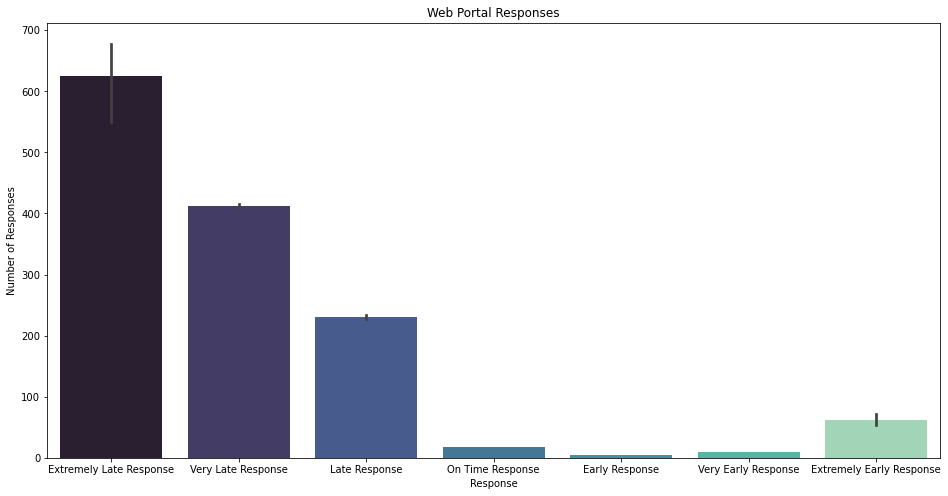

In [17]:
plt.figure(figsize=(16,8))
sns.barplot(data=web, x=web.level_of_delay, y='days_open', palette='mako')
plt.title('Web Portal Responses')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()

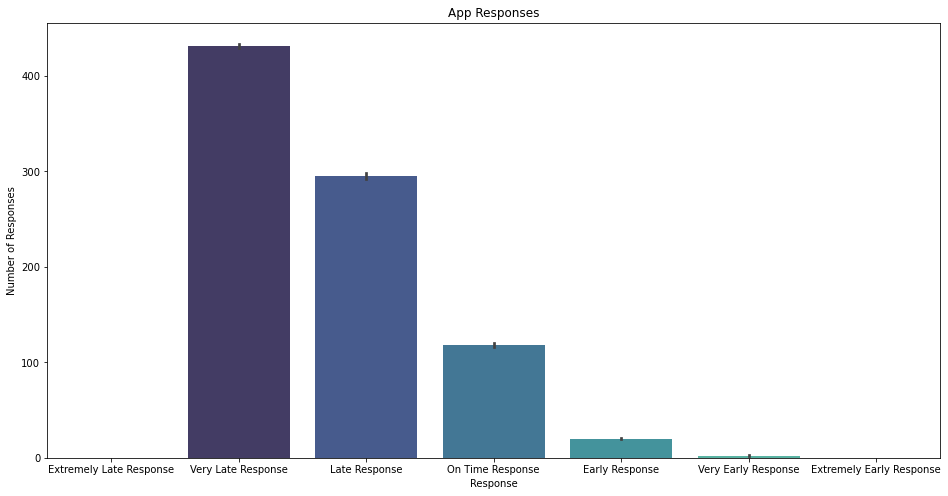

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(data=app, x=app.level_of_delay, y='days_open', palette='mako')
plt.title('App Responses')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()

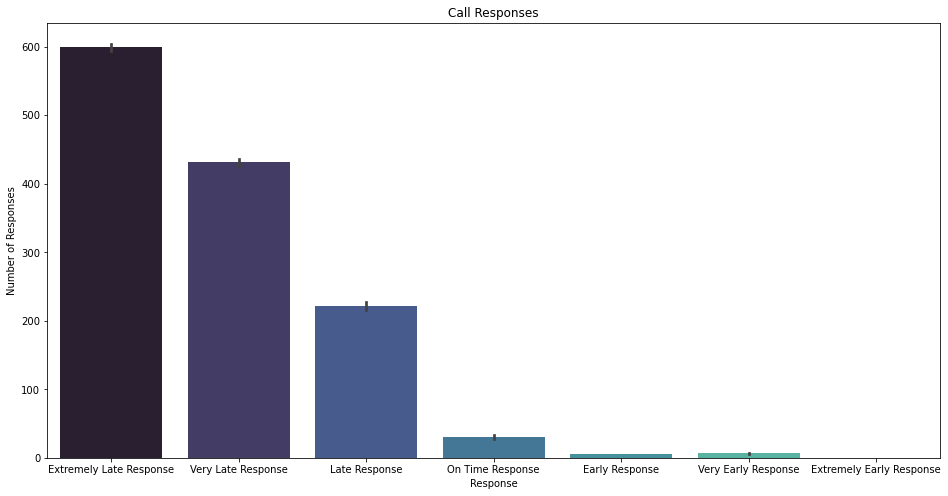

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(data=call, x=call.level_of_delay, y='days_open', palette='mako')
plt.title('Call Responses')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()

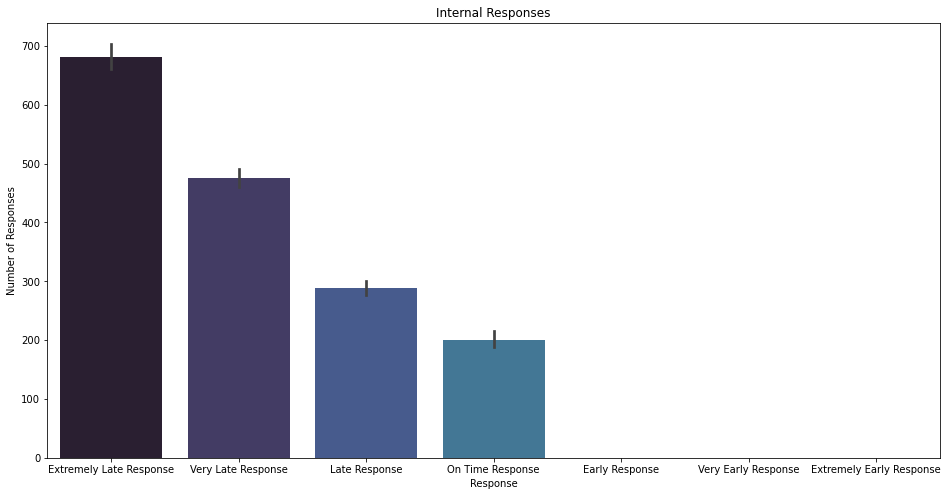

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(data=internal, x=internal.level_of_delay, y='days_open', palette='mako')
plt.title('Internal Responses')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()

#### Takeaways

- When an issue was reported via app, there were no extremely late responses.
- App had the most amount of of early response
- web portal had most amount of extremely early responses

### Source ID Statistical Tests

#### The χ2 test can be used to compare two categorical variables and helps us answer questions like:

- Is whether or not a customer churns independent of their subscription plan?
- Are doctors less likely to smoke?
- Does playing on the home field give a soccer team an advantage?

In [21]:
from scipy import stats

In [58]:
#set confidence interval and alpha before the test
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

In [59]:
#calculate actual proportions
observed = pd.crosstab(train.source_id, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [60]:
print("Relationship of Source Id to Level of Delay")
print("chi-square: ", chi2, "; p-value: ", p)


Relationship of Source Id to Level of Delay
chi-square:  40745.92828470112 ; p-value:  0.0


In [71]:
# null and alternative hypothesis
null = "The source of the issue and the level of delay are independent from each other"
alt = "The source and the level of delay are dependent from one another."

if p < alpha:
    print("I reject the null hypothesis:  ")
    print(alt)
    print('--------------------------------------------------------------------------------')
    print(f'The alpha is:', alpha)
    print(f'P Value is: ', p)
else:
    print("I fail to reject the null hypothesis")
    print(null)
    print('--------------------------------------------------------------------------------')
    print(f'The alpha is:', alpha)
    print(f'P Value is: ', p)

I reject the null hypothesis:  
The source and the level of delay are dependent from one another.
--------------------------------------------------------------------------------
The alpha is: 0.050000000000000044
P Value is:  0.0


## Call Reason x Level of Delay

### Call Reason Statistical Test

#### Is there a significant difference between the call reason and level of delay?

In [72]:
#set confidence interval and alpha before the test
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

In [73]:
#calculate actual proportions
observed = pd.crosstab(train.call_reason, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [74]:
print("Relationship of Call Reason to Level of Delay")
print("chi-square: ", chi2, "; p-value: ", p)


Relationship of Call Reason to Level of Delay
chi-square:  114524.01110649893 ; p-value:  0.0


In [75]:
# null and alternative hypothesis
null = "The call reason of the issue and the level of delay are independent from each other"
alt = "The call reason and the level of delay are dependent from one another."

if p < alpha:
    print("I reject the null hypothesis:  ")
    print(alt)
    print('--------------------------------------------------------------------------------')
    print(f'The alpha is:', alpha)
    print(f'P Value is: ', p)
else:
    print("I fail to reject the null hypothesis")
    print(null)
    print('--------------------------------------------------------------------------------')
    print(f'The alpha is:', alpha)
    print(f'P Value is: ', p)

I reject the null hypothesis:  
The call reason and the level of delay are dependent from one another.
--------------------------------------------------------------------------------
The alpha is: 0.050000000000000044
P Value is:  0.0


In [24]:
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1018 KING AVE, San Antonio, 78211",4,2108015.0,13680344.0,804.0,933,129.0,Very Early Response,0,0,0,0,1,0,0,0,0,0,0,78211
2657,1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"11800 FISCHER RD, San Antonio, 78073",4,2091672.0,13658660.0,805.0,131,-674.0,Extremely Late Response,0,0,0,0,1,0,0,0,0,0,0,78073


In [25]:
# Look at all forms of reporting
train.call_reason.value_counts()

waste               82056
code                53529
field               32153
misc                11393
streets              5711
trades               4980
traffic              3454
customer_service     2272
storm                1900
land                  978
business              787
license               412
buildings             100
cleanup                35
Name: call_reason, dtype: int64

In [26]:
#Make separate df for each service
waste = train[train.call_reason == 'waste']
code = train[train.call_reason == 'code']
field = train[train.call_reason == 'field']
misc = train[train.call_reason == 'misc']
streets = train[train.call_reason == 'streets']
traffic = train[train.call_reason == 'traffic']
customer_service  = train[train.call_reason == 'customer_service']
storm = train[train.call_reason == 'storm']
land = train[train.call_reason == 'land']
business = train[train.call_reason == 'business']
license = train[train.call_reason == 'license']
buildings  = train[train.call_reason == 'buildings']
cleanup = train[train.call_reason == 'cleanup']


In [28]:
#plt.figure(figsize=(16,8))
#sns.barplot(data=web, )
#plt.title('Waste Responses')
#plt.xlabel('Response')
#plt.ylabel('Number of days open')
#plt.show()

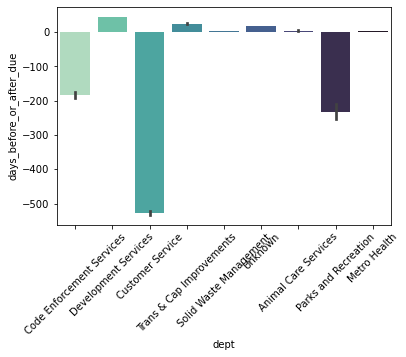

In [29]:
sns.barplot( x='dept', y='days_before_or_after_due', data=df, palette='mako_r')
plt.xticks(rotation=45)
plt.show()

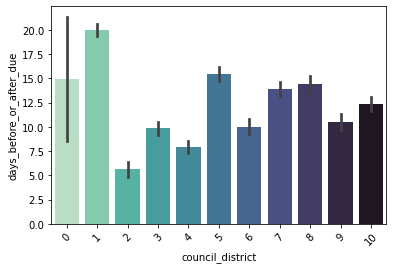

In [30]:
sns.barplot(x='council_district',  y='days_before_or_after_due', data=df, palette='mako_r')
plt.xticks(rotation=45)
plt.show()

In [31]:
df.shape

(356715, 30)

In [32]:
#df.days_before_or_after_due.value_counts()

In [33]:
df.level_of_delay.value_counts()

Early Response              264640
On Time Response             51531
Very Early Response          27320
Late Response                 8938
Very Late Response            3148
Extremely Late Response        991
Extremely Early Response       147
Name: level_of_delay, dtype: int64

In [34]:
train.level_of_delay.value_counts()

Early Response              148291
On Time Response             28655
Very Early Response          15385
Late Response                 4997
Very Late Response            1782
Extremely Late Response        572
Extremely Early Response        78
Name: level_of_delay, dtype: int64

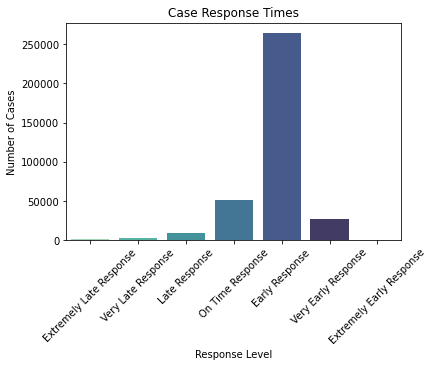

In [35]:
sns.countplot(x='level_of_delay', data=df, palette='mako_r')
plt.title('Case Response Times')
plt.xlabel('Response Level')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

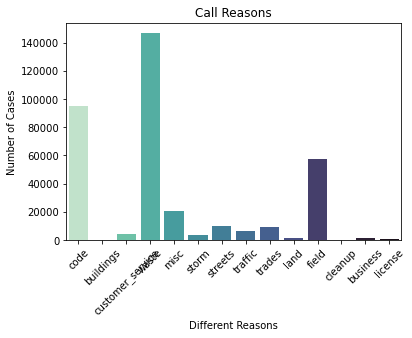

In [36]:
sns.countplot(x='call_reason', data=df, palette='mako_r')
plt.title('Call Reasons')
plt.xlabel('Different Reasons')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

In [38]:
df.zipcode.value_counts()[:-20]

78207    20397
78228    19859
78210    18005
78201    16607
78237    14605
78223    13202
78227    12978
78212    11352
78221    11071
78250    10767
78211    10372
78247     9985
78242     9248
78218     8963
78214     8936
78213     8895
78251     8391
78216     8178
78249     8121
78209     7596
78220     7484
78233     7361
78230     6417
78202     6382
78217     6376
78245     6300
78222     6285
78240     6184
78204     5555
78232     5228
78225     5091
78224     4844
78254     4434
78238     4127
78203     3636
78259     3286
78244     3204
78229     3018
78258     2864
78226     2375
78219     2040
78248     1950
78208     1842
78205     1576
78252     1327
78231     1303
78109     1194
78239     1193
78023     1145
78215     1026
78256      778
78255      753
78257      484
78253      361
78266      305
78235      300
78260      270
78264      207
Name: zipcode, dtype: int64

In [39]:
df.to_csv('311.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356715 entries, 2497 to 495432
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   356715 non-null  int64         
 1   open_date                 356715 non-null  datetime64[ns]
 2   due_date                  356715 non-null  datetime64[ns]
 3   closed_date               356715 non-null  datetime64[ns]
 4   is_late                   356715 non-null  object        
 5   dept                      356715 non-null  object        
 6   call_reason               356715 non-null  object        
 7   case_type                 356715 non-null  object        
 8   case_status               356715 non-null  object        
 9   source_id                 356715 non-null  object        
 10  address                   356715 non-null  object        
 11  council_district          356715 non-null  int64         
 12 

In [44]:
#df.isna().sum()

In [45]:
#df.dropna(subset=['zipcode'], how='all', inplace=True)

In [46]:
#df.isna().sum()

In [47]:
df.shape

(356715, 30)

In [48]:
df.council_district.value_counts()

5     49986
2     46987
1     45889
3     45709
4     34595
7     33447
6     30364
10    29372
9     19437
8     19435
0      1494
Name: council_district, dtype: int64

In [51]:
train.columns.to_list()

['case_id',
 'open_date',
 'due_date',
 'closed_date',
 'is_late',
 'dept',
 'call_reason',
 'case_type',
 'case_status',
 'source_id',
 'address',
 'council_district',
 'longitude',
 'latitude',
 'days_open',
 'resolution_days_due',
 'days_before_or_after_due',
 'level_of_delay',
 'district_0',
 'district_1',
 'district_2',
 'district_3',
 'district_4',
 'district_5',
 'district_6',
 'district_7',
 'district_8',
 'district_9',
 'district_10',
 'zipcode']

### quant vs qual variables

In [52]:
train['is_late'] = train['is_late'].astype('bool')


In [53]:
categorical = ['is_late',
                    'dept',
                    'call_reason',
                    'case_type',
                    'case_status',
                    'source_id',
                    'council_district',
                    'district_0',
                    'district_1',
                    'district_2',
                    'district_3',
                    'district_4',
                    'district_5',
                    'district_6',
                    'district_7',
                    'district_8',
                    'district_9',
                    'district_10']

In [54]:
numeric = ['days_open',
                'resolution_days_due',
                'days_before_or_after_due',]

In [55]:
target = 'level_of_delay'

<Figure size 1152x288 with 0 Axes>

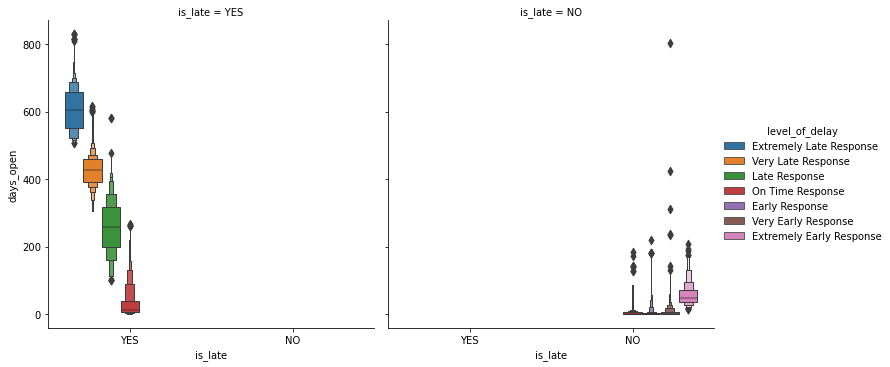

<Figure size 1152x288 with 0 Axes>

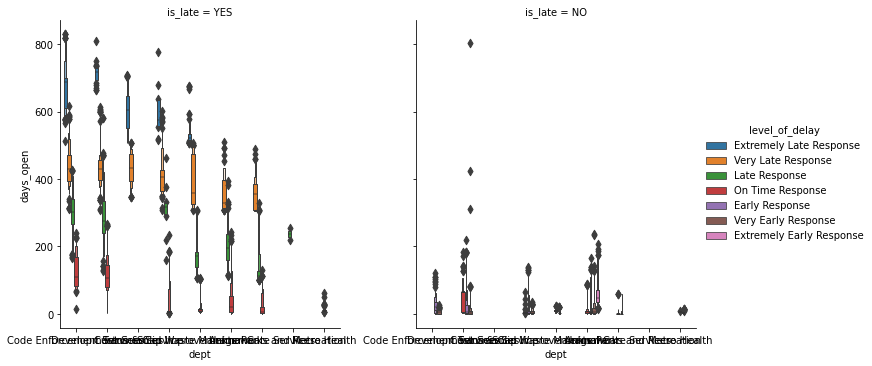

<Figure size 1152x288 with 0 Axes>

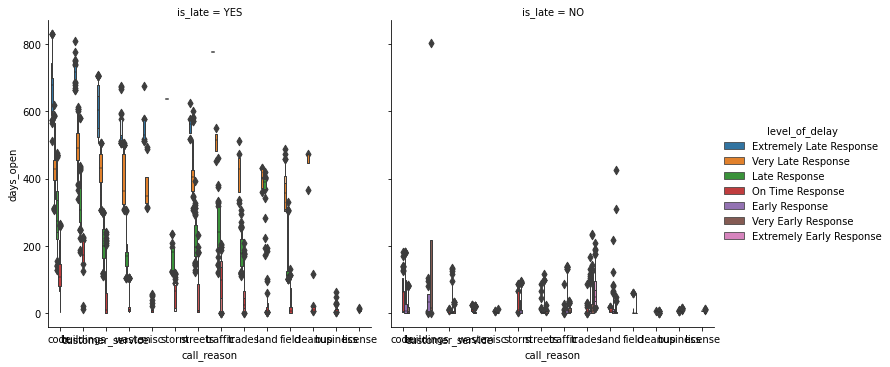

<Figure size 1152x288 with 0 Axes>

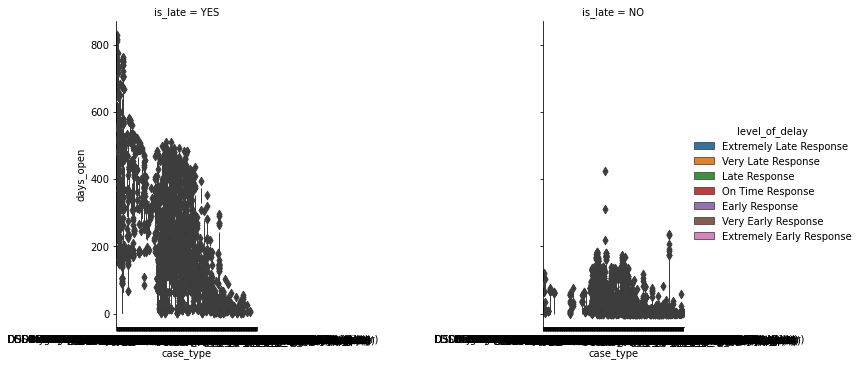

<Figure size 1152x288 with 0 Axes>

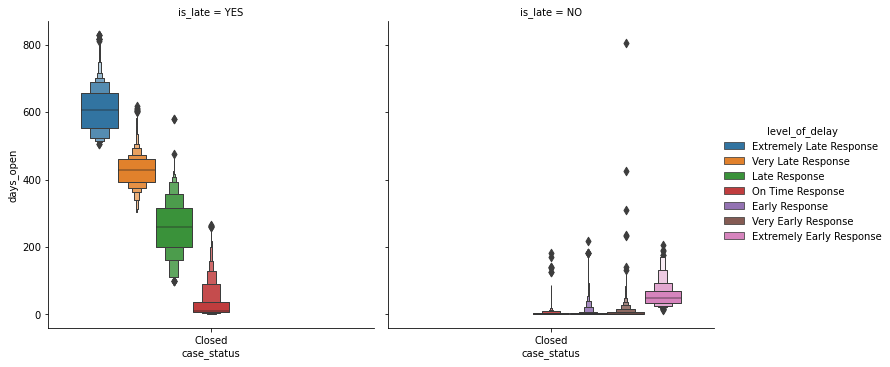

<Figure size 1152x288 with 0 Axes>

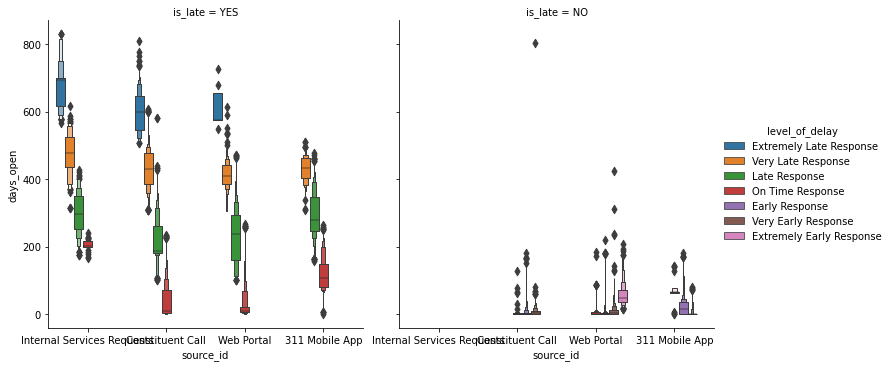

<Figure size 1152x288 with 0 Axes>

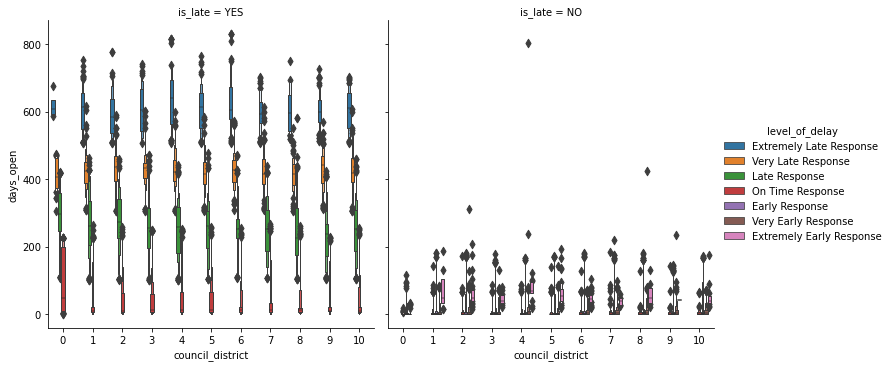

<Figure size 1152x288 with 0 Axes>

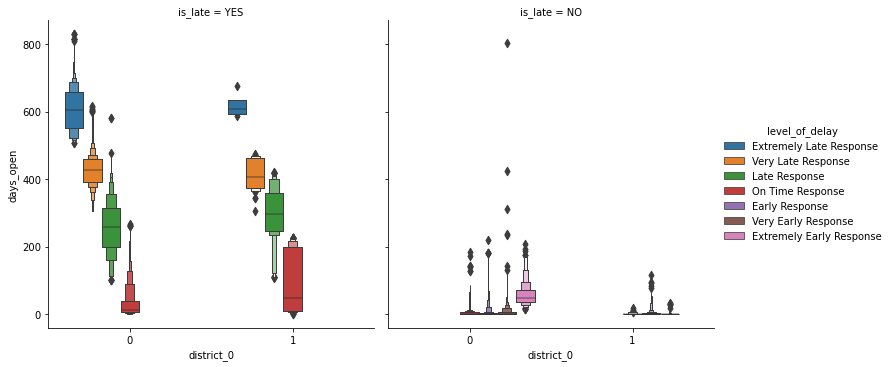

<Figure size 1152x288 with 0 Axes>

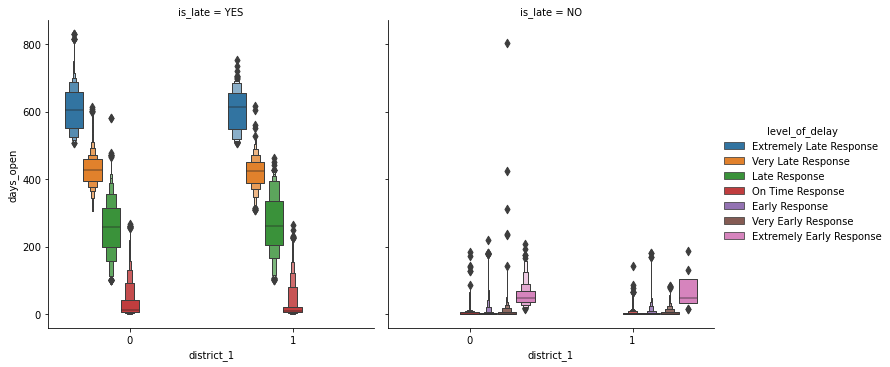

<Figure size 1152x288 with 0 Axes>

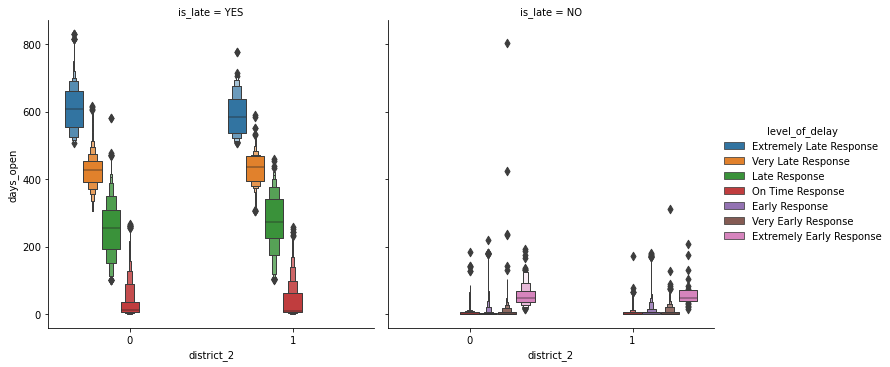

<Figure size 1152x288 with 0 Axes>

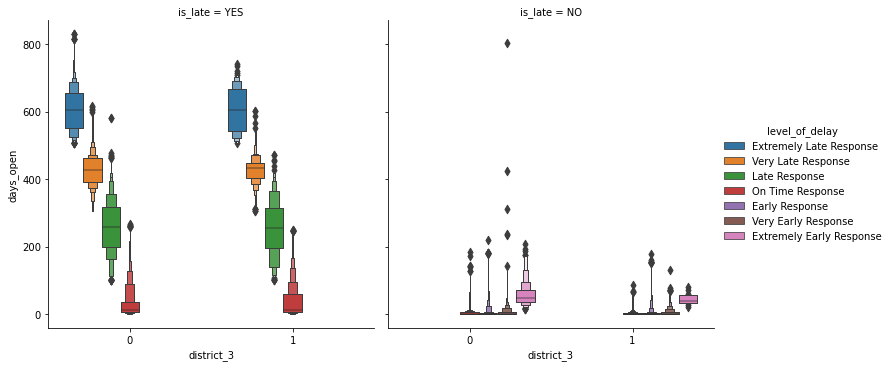

<Figure size 1152x288 with 0 Axes>

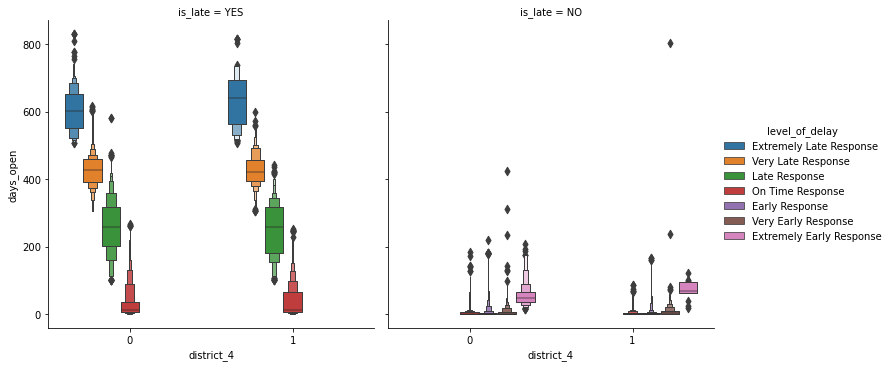

<Figure size 1152x288 with 0 Axes>

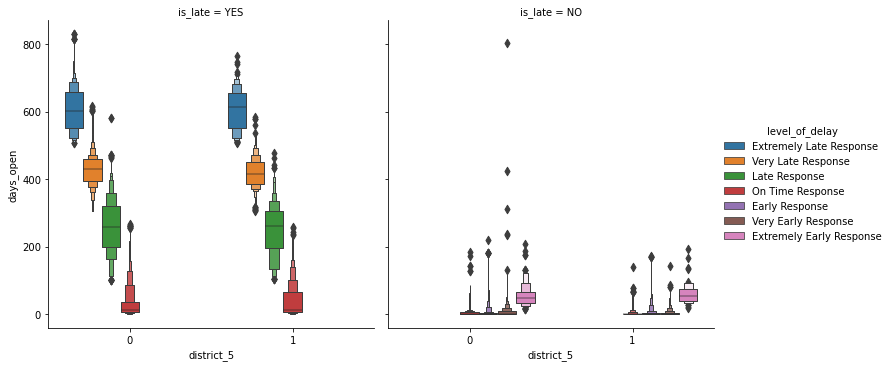

<Figure size 1152x288 with 0 Axes>

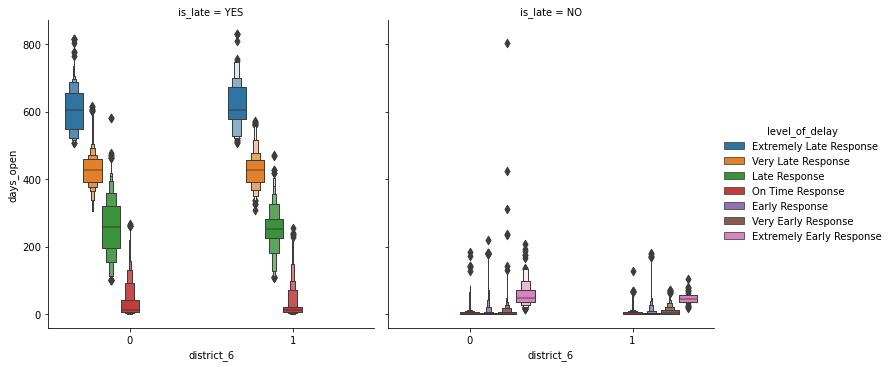

<Figure size 1152x288 with 0 Axes>

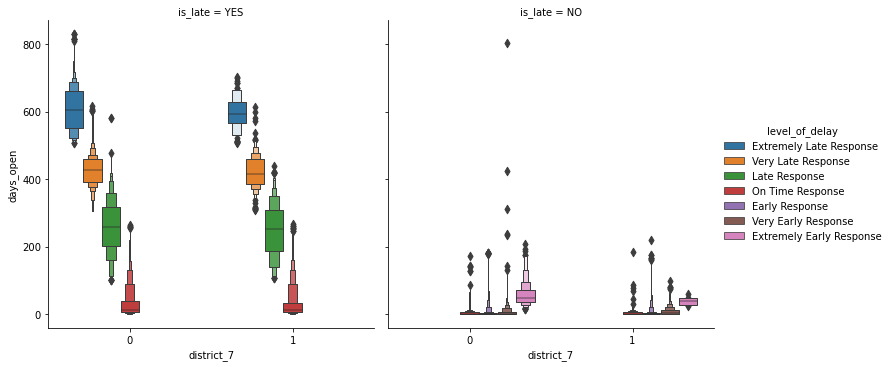

<Figure size 1152x288 with 0 Axes>

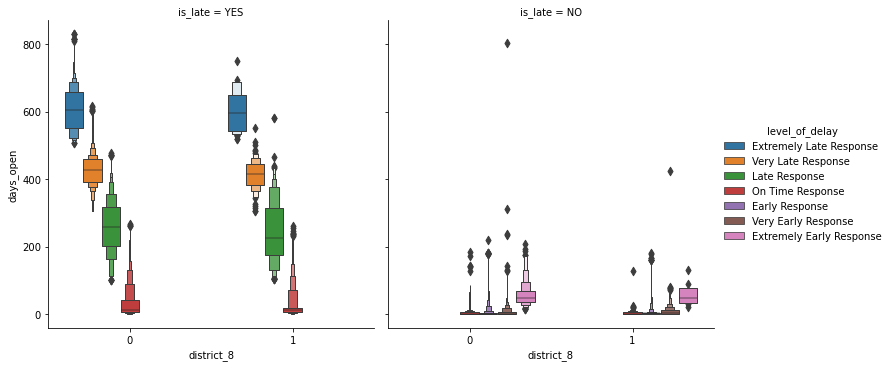

<Figure size 1152x288 with 0 Axes>

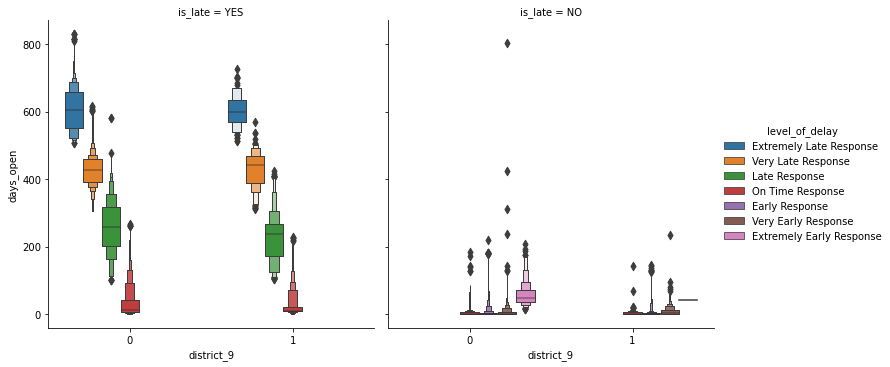

<Figure size 1152x288 with 0 Axes>

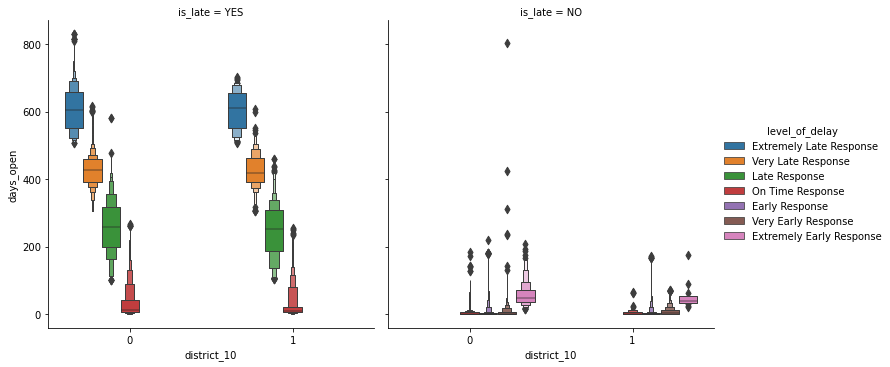

<Figure size 1152x288 with 0 Axes>

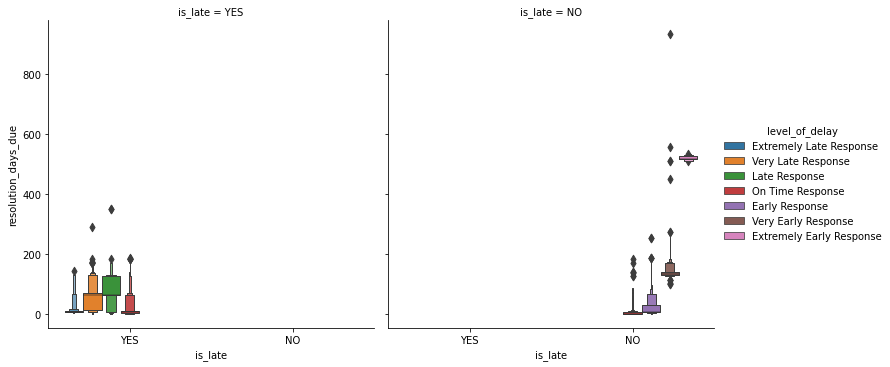

<Figure size 1152x288 with 0 Axes>

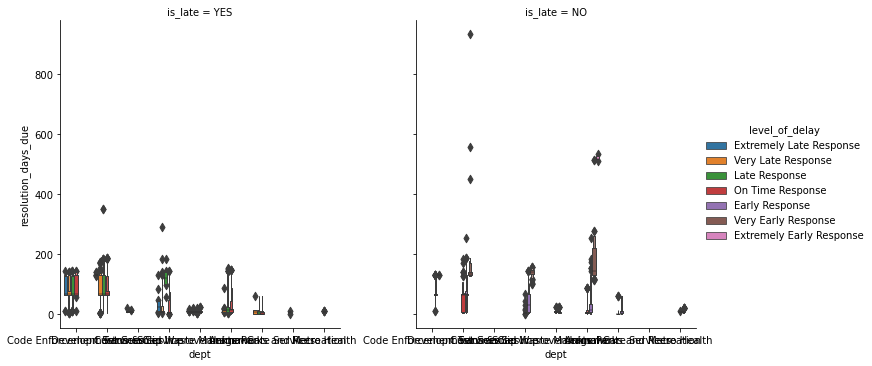

<Figure size 1152x288 with 0 Axes>

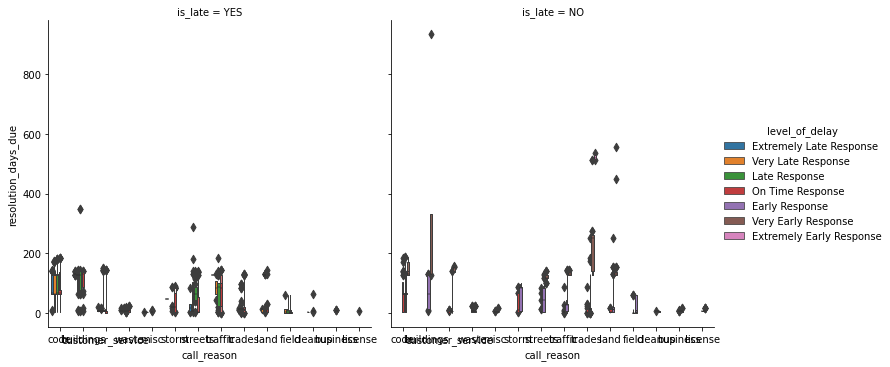

<Figure size 1152x288 with 0 Axes>

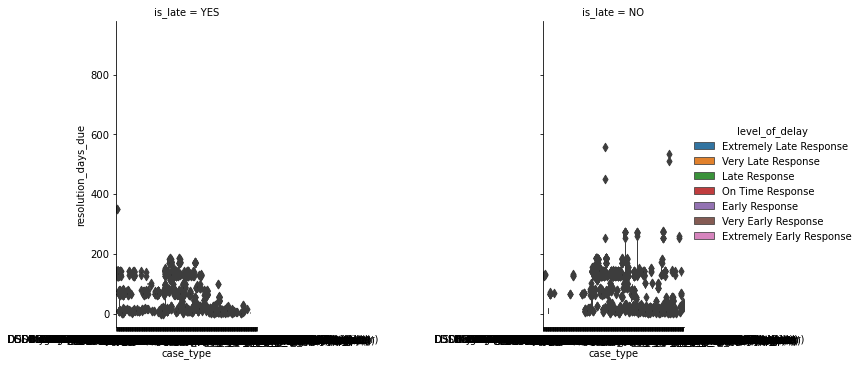

<Figure size 1152x288 with 0 Axes>

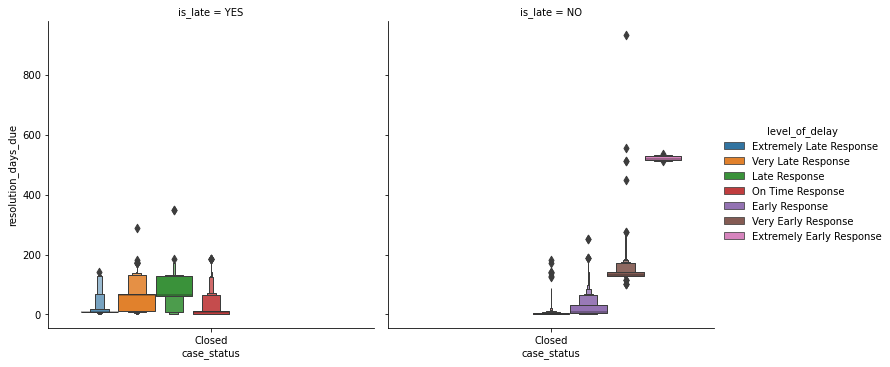

<Figure size 1152x288 with 0 Axes>

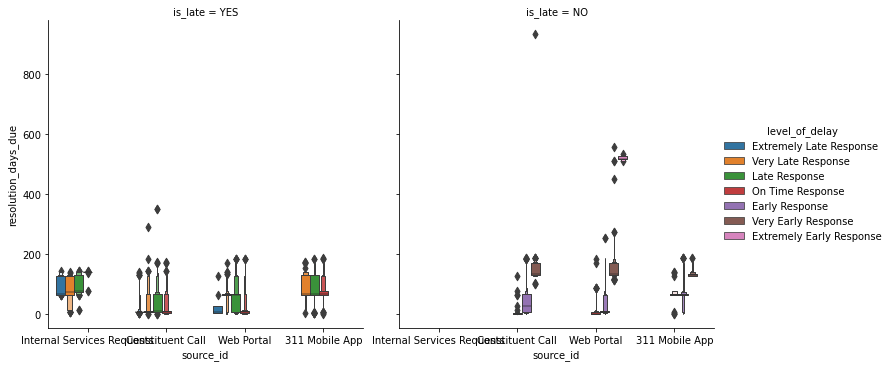

<Figure size 1152x288 with 0 Axes>

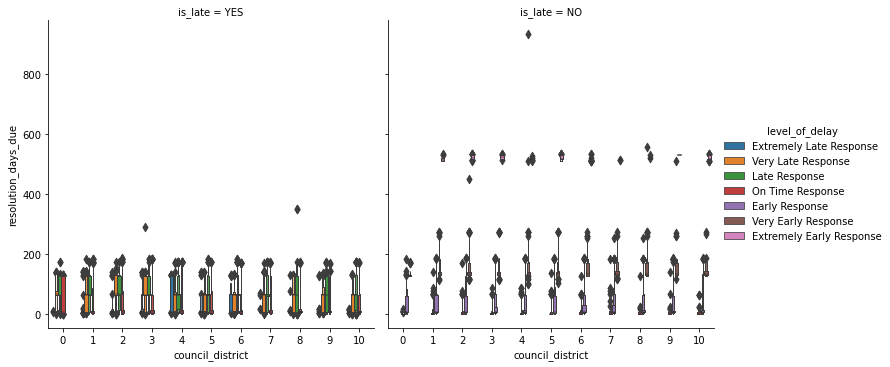

<Figure size 1152x288 with 0 Axes>

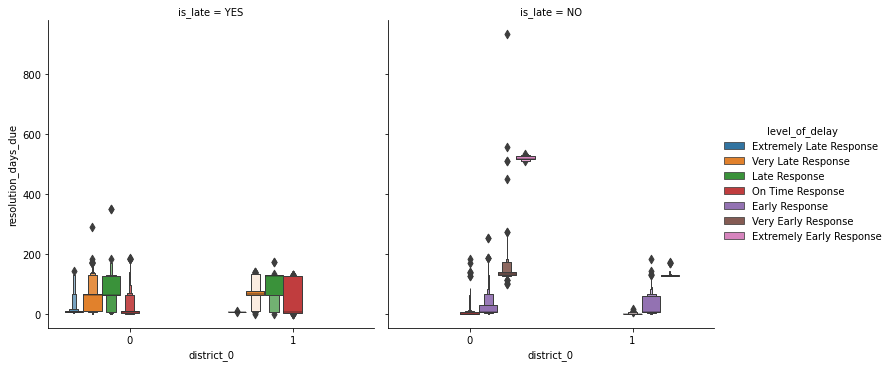

<Figure size 1152x288 with 0 Axes>

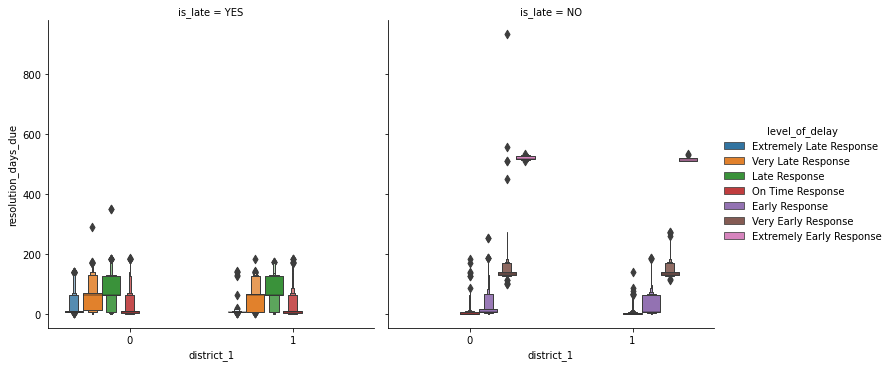

<Figure size 1152x288 with 0 Axes>

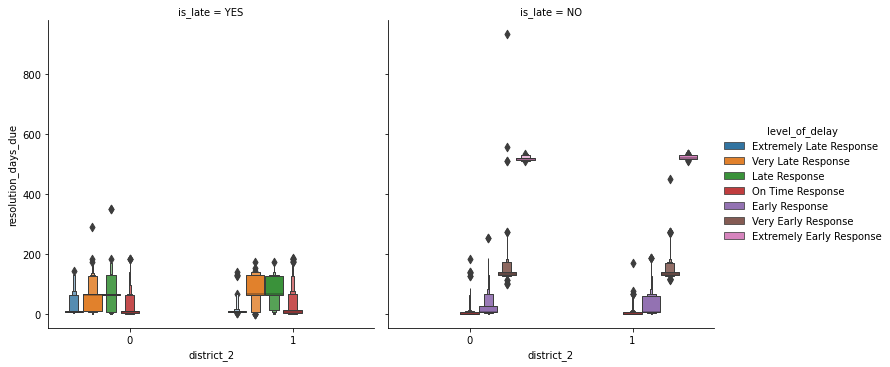

<Figure size 1152x288 with 0 Axes>

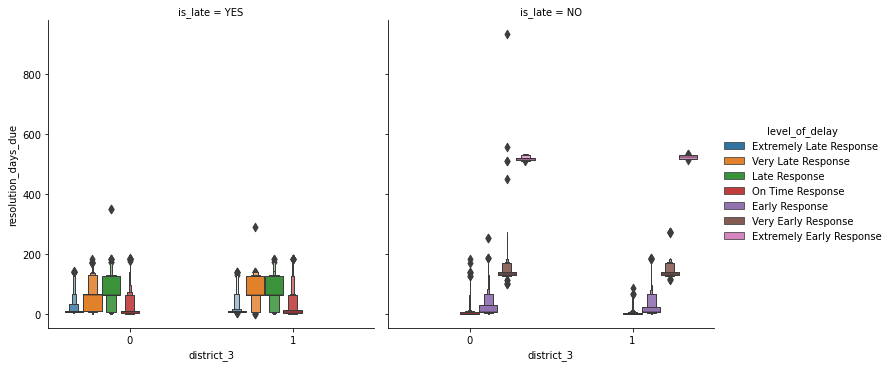

<Figure size 1152x288 with 0 Axes>

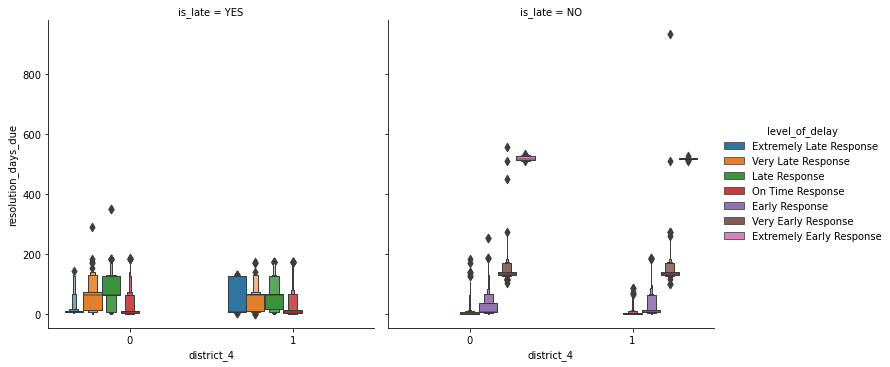

<Figure size 1152x288 with 0 Axes>

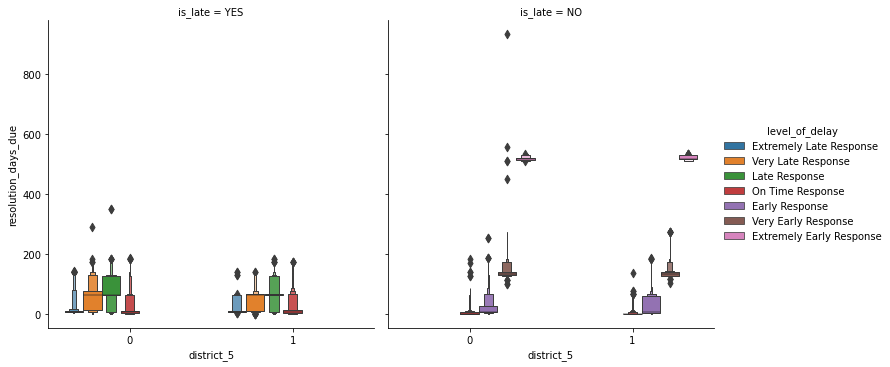

<Figure size 1152x288 with 0 Axes>

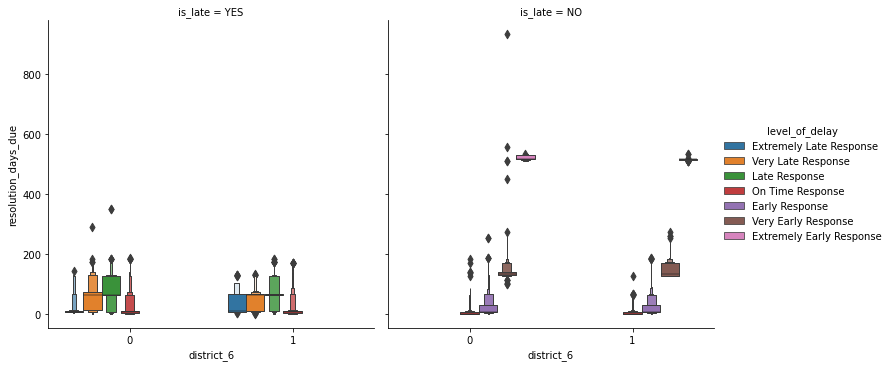

<Figure size 1152x288 with 0 Axes>

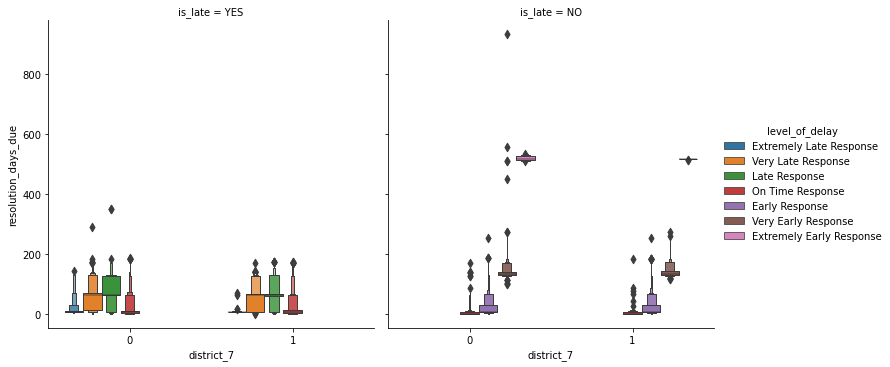

<Figure size 1152x288 with 0 Axes>

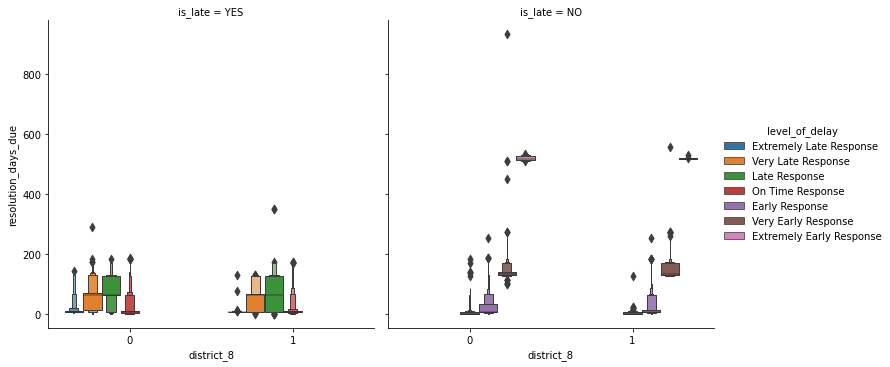

<Figure size 1152x288 with 0 Axes>

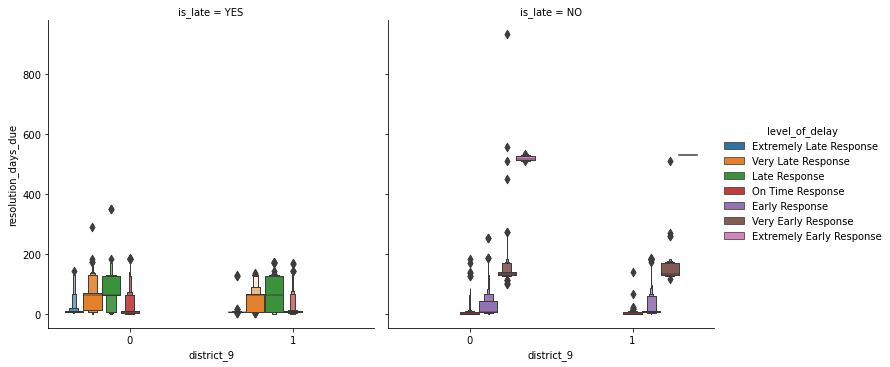

<Figure size 1152x288 with 0 Axes>

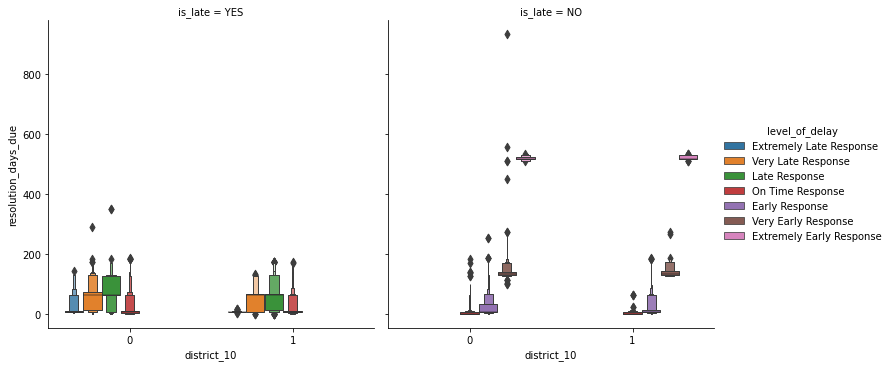

<Figure size 1152x288 with 0 Axes>

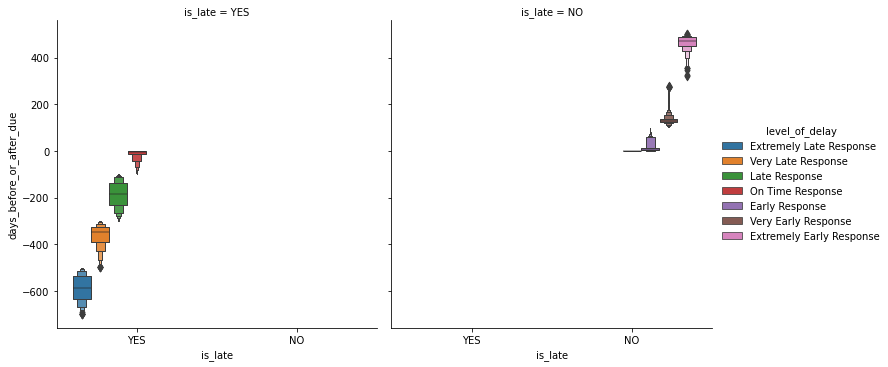

<Figure size 1152x288 with 0 Axes>

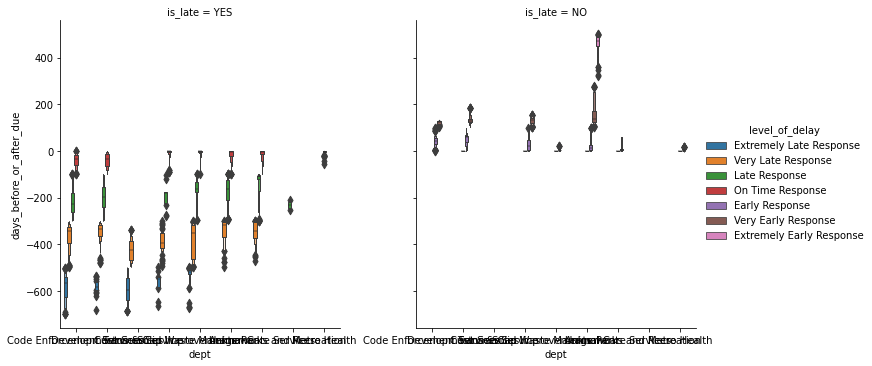

<Figure size 1152x288 with 0 Axes>

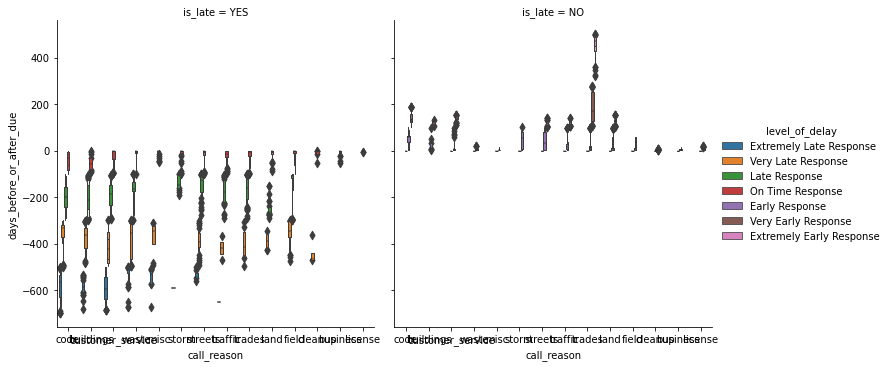

<Figure size 1152x288 with 0 Axes>

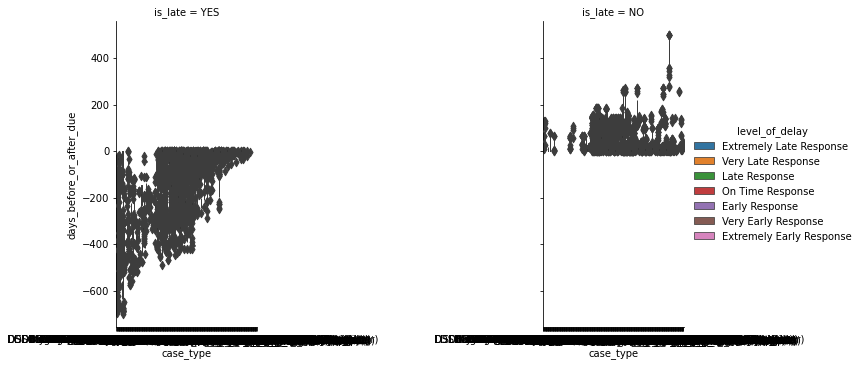

<Figure size 1152x288 with 0 Axes>

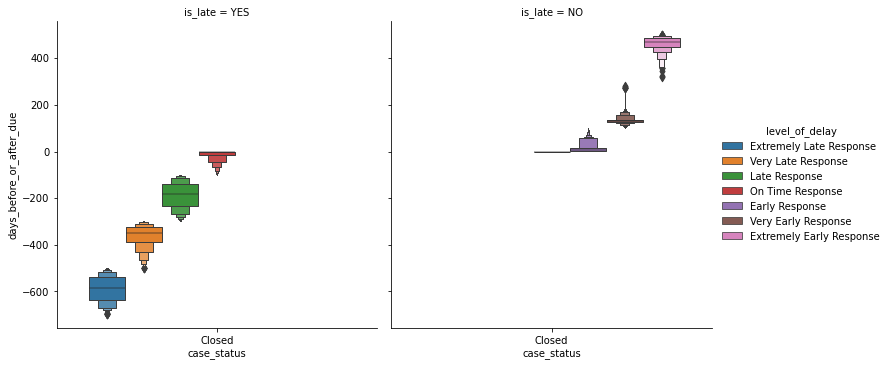

<Figure size 1152x288 with 0 Axes>

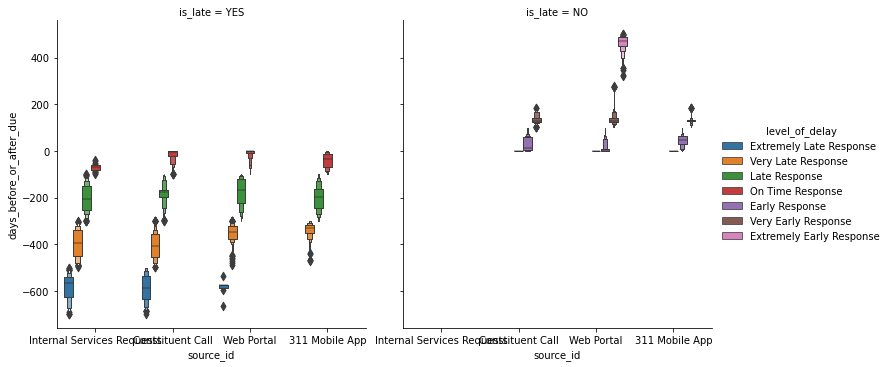

<Figure size 1152x288 with 0 Axes>

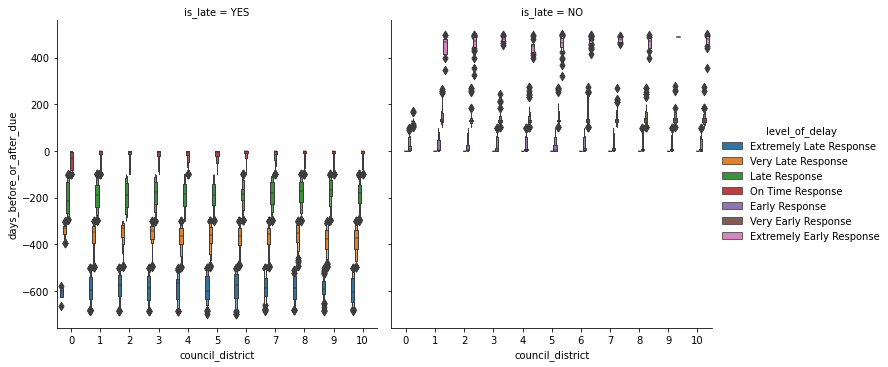

<Figure size 1152x288 with 0 Axes>

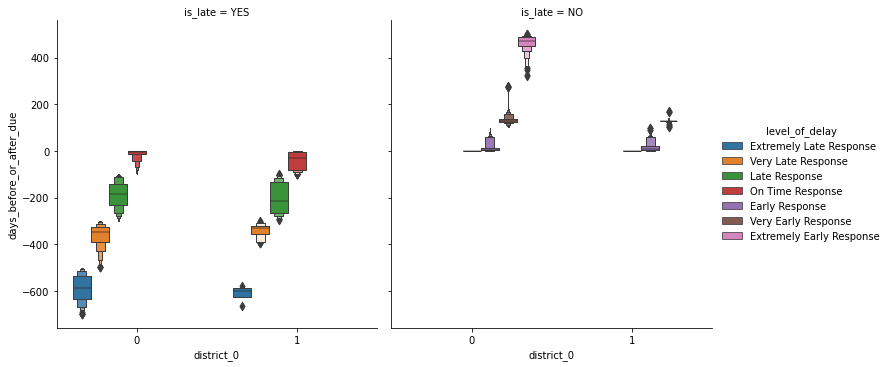

<Figure size 1152x288 with 0 Axes>

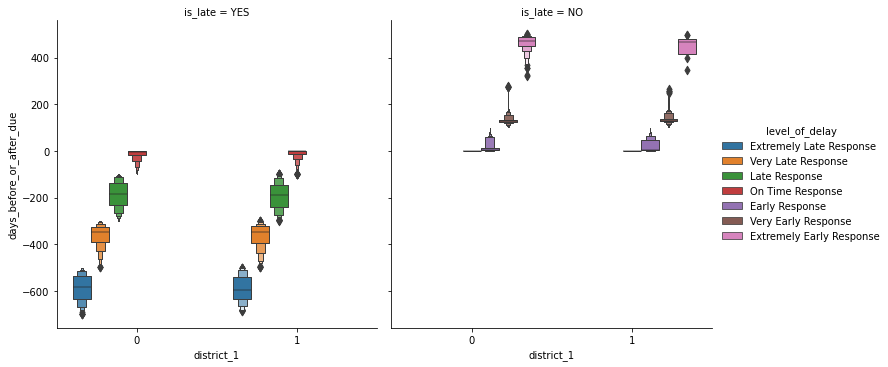

<Figure size 1152x288 with 0 Axes>

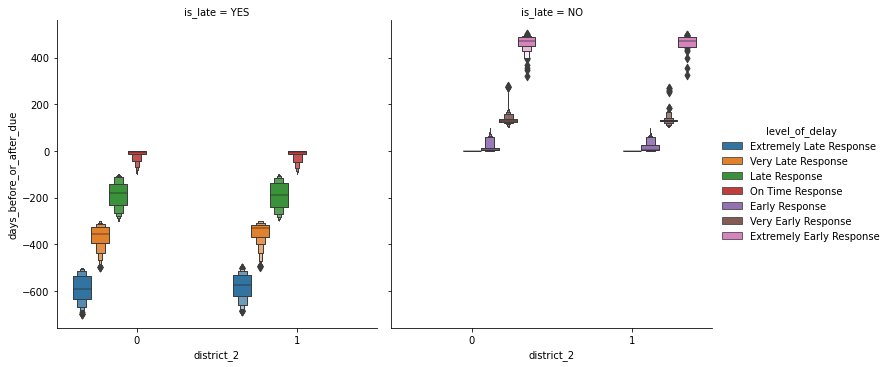

<Figure size 1152x288 with 0 Axes>

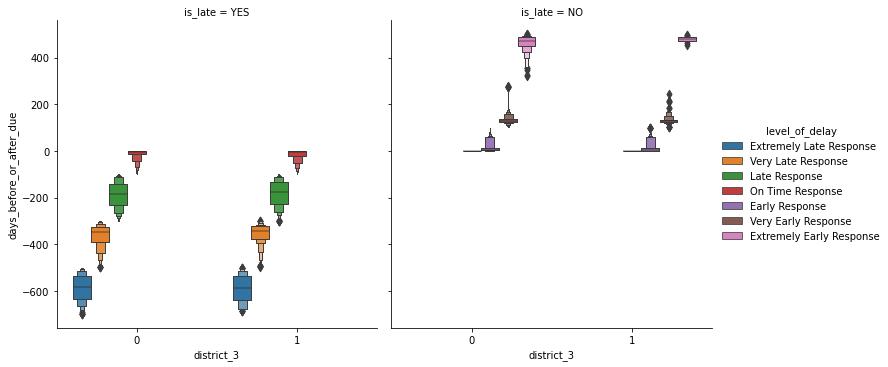

<Figure size 1152x288 with 0 Axes>

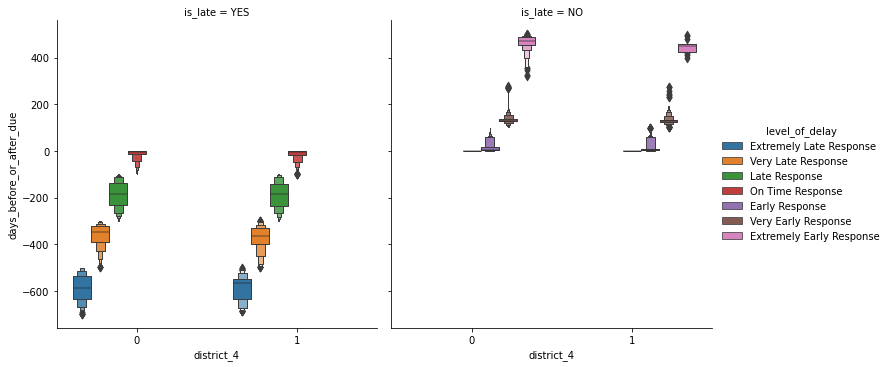

<Figure size 1152x288 with 0 Axes>

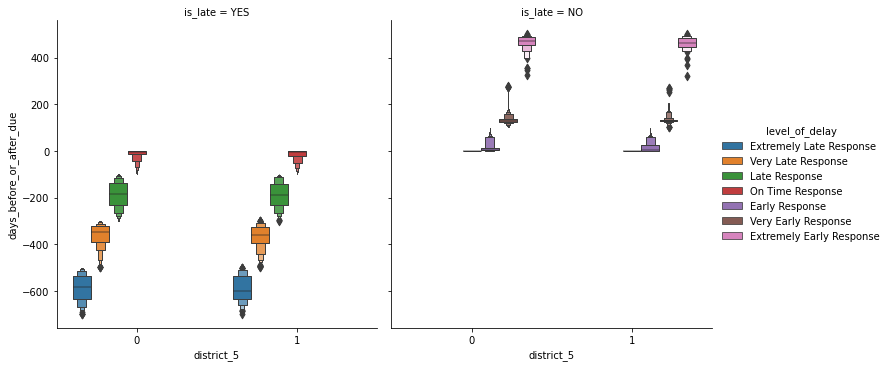

<Figure size 1152x288 with 0 Axes>

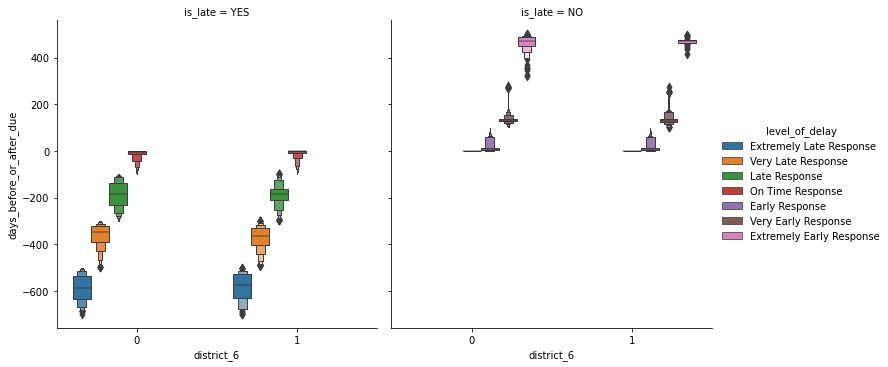

<Figure size 1152x288 with 0 Axes>

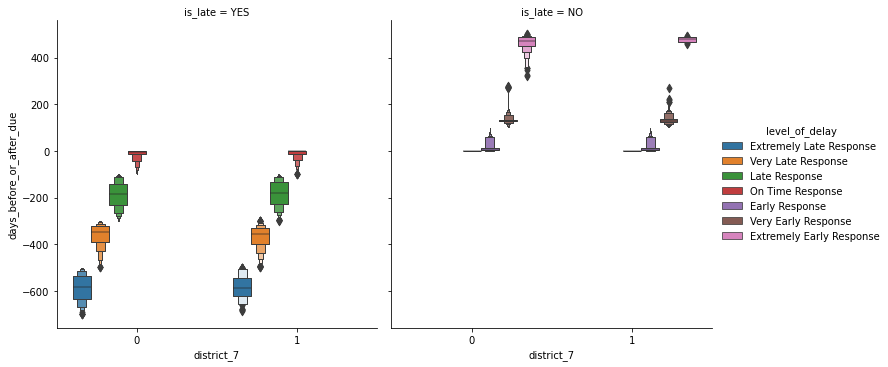

<Figure size 1152x288 with 0 Axes>

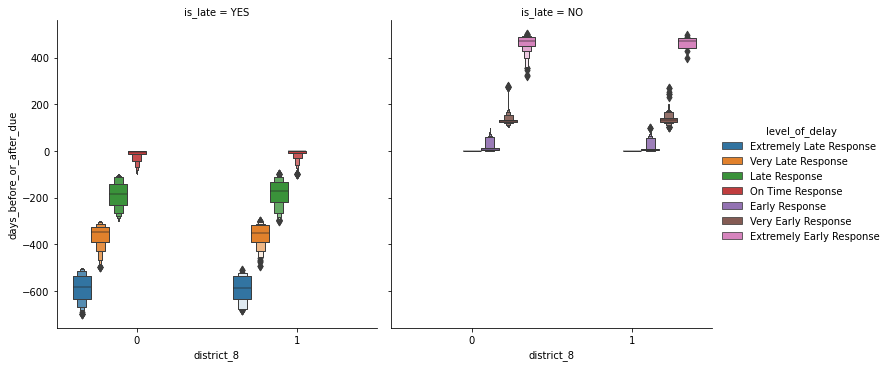

<Figure size 1152x288 with 0 Axes>

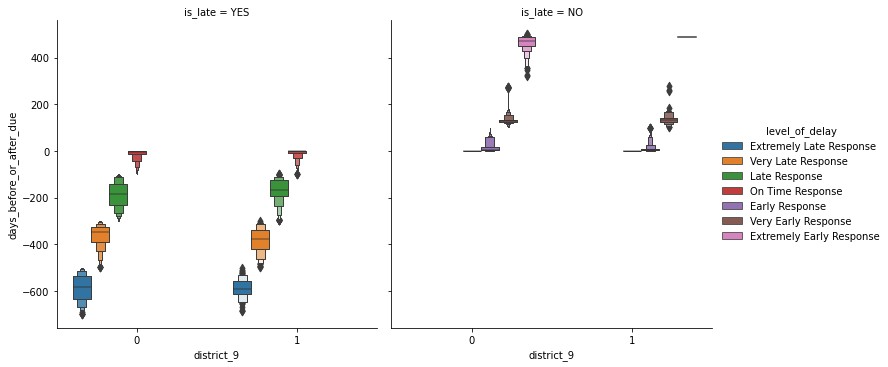

<Figure size 1152x288 with 0 Axes>

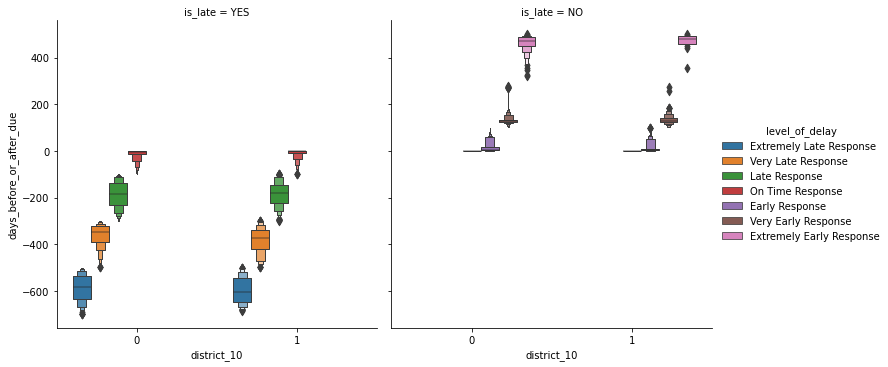

In [56]:
for num in numeric:
    for cat in categorical:
        plt.figure(figsize=(16,4))
        sns.catplot(x=cat, y=num, hue='level_of_delay', col="is_late", kind="boxen", data=df)
        plt.show()